# Pandas to arrays

https://pythonguides.com/convert-pandas-dataframe-to-numpy-array/

In [ ]:
import pandas as pd

In [ ]:
csv = "ext_array.csv"
df = pd.read_csv(csv)
df.head()

In [ ]:
df.describe()

In [ ]:
#auxFrame = df.filter(items=["xcentre", "ycentre", "zcentre"])[:100000]

In [ ]:
df.describe()

In [ ]:
x = df.to_numpy()

In [ ]:
x.shape, x.size, x.ndim

In [ ]:
y = x.reshape(9049,5,3)

In [ ]:
y.T

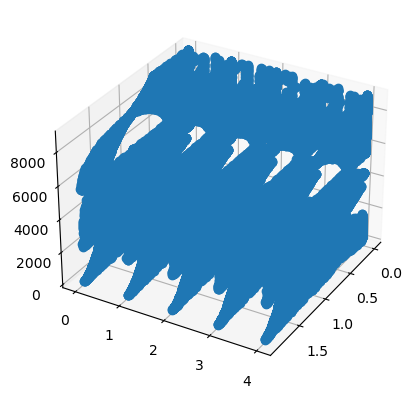

'\nimport open3d as o3d\nmcubes.export_obj(verts, faces, \'xyz.obj\')\n\nmesh = o3d.io.read_triangle_mesh("xyz.obj")\no3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True)\n'

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import mcubes

y = x.reshape(9049,5,3)

from skimage import measure
verts, faces, normals, values = measure.marching_cubes(y.T, spacing=(1.0, 1.0, 1.0), gradient_direction='ascent')
#verts, faces = mcubes.marching_cubes(y.T, 100)


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#ax.axes.set_xlim3d(left=-10, right=1000)
#ax.axes.set_ylim3d(bottom=-10, top=1000) 
#ax.axes.set_zlim3d(bottom=-10, top=1000) 
plt.plot(verts[:,0],verts[:,1],verts[:,2], "o",  alpha=1)

ax.view_init(30, 30)
plt.show()

'''
import open3d as o3d
mcubes.export_obj(verts, faces, 'xyz.obj')

mesh = o3d.io.read_triangle_mesh("xyz.obj")
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True)
'''

In [ ]:
with np.printoptions(precision=3, suppress=True):
    print(verts.shape, verts.size, verts)

In [ ]:
np.set_printoptions(precision=3)
values